# SUPPORT VECTOR MACHINE
SVM bekerja dengan memetakan data ke ruang fitur berdimensi tinggi sehingga titik data dapat dikategorikan, bahkan ketika datanya tidak dapat dipisahkan secara linier. Ditemukan pemisah antar kategori, kemudian data ditransformasikan sedemikian rupa sehingga pemisah tersebut dapat digambar sebagai bidang hiper. Setelah ini, karakteristik data baru dapat digunakan untuk memprediksi grup yang akan memasukkan record baru.

Metode yang digunakan oleh SVM adalah metode learning machine yaitu bekerja pada dengan prinsip Structural Risk Minimizationyang bertujuan menemukan hyperplane terbaik yang memasihkan 2 buah class pada ruang input.
  
Svm linier merupakan pemisahan data menurut linier-nya. Pemisah terbaik tidak hanya dapat memisahkan data, tetapi juga margin. Selanjutnya agar SVM dapat memisahkan data yang tidak hanya secara linier makan SVM akan dimodifikasi.

 SVM sama seperti yang lainnya, memiliki kelebihan beserta kekurangan. Kelebihan SVM adalah :
-mampu mengklasifikasikan pattern-pattern yang tidak masuk dalam kelas atau kategori metode yang menjadi pembelajaran. Kemampuan ini dinamai sebagai Generalisasi. Karena memiliki strategi SRM, Suppor vector machine bisa meminimalkan error pada training set dan juga error yang dipengaruhi oleh faktor VC.

-Masalah dalam menghadapi suatu pattern disebut sebagai Curse of dimensionality. Masalah ini bisa terjadi dikarenakan jumlah data yang ada lebih sedikit dibandingkan dengan dimesional ruang vector data tersebut. Karena prinsipnya adalah semakin tinggi dimesional makan diperlukan pula data yang lebih dalam proses pembelajaran.
SVM memiliki Landasan teori yang jelas.

-Dengan kelebihannya, SVM juga mampu diimplementasikan dengan mudah. Mengapa bisa begitu? Karena proses dalam menentukan SVM bisa dapat dirumuskan dengan QP problem. Jadi caranya cukup mudah yaitu dengan memiliki library untuk menyelesaikan Qp problem, maka selanjutnya SVM akan berimplimentasi secara mudah dengan sendirinya. Kelebihan ini disebut dengan Feasibility.

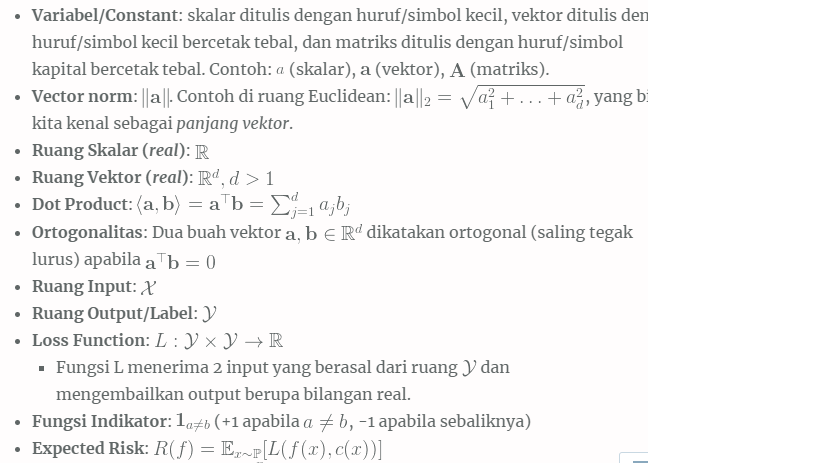




SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. Dalam 2-D fungsi yang digunakan untuk klasifikasi antar kelas disebut sebagai line whereas, fungsi yang digunakan untuk klasifikasi antas kelas dalam 3-D disebut plane similarly, sedangan fungsi yang digunakan untuk klasifikasi di dalam ruang kelas dimensi yang lebih tinggi di sebut hyperplane.

# libary yang digunakan

############ PRINT SVM INFO ################
C: 1
max_iter: 10000
epsilon: 0.01
kernel_type: linear

Accuracy: 0.6


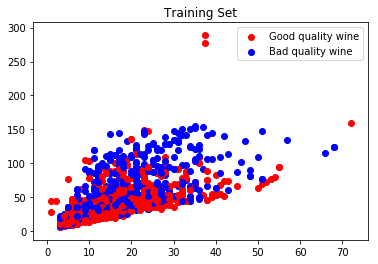

############ PRINT SVM INFO ################
C: 10
max_iter: 100
epsilon: 0.01
kernel_type: quadratic

Accuracy: 0.6125


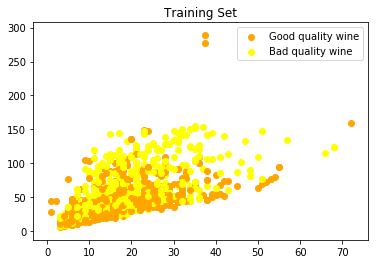

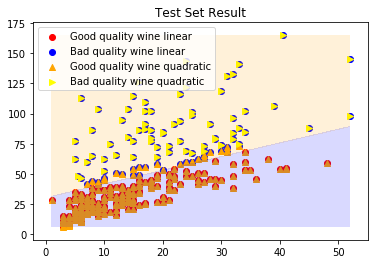

In [15]:
import csv
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x1_fixed_acidity = []
x2_volatile_acidity = []
x3_citric_acid = []
x4_residual_sugar = []
x5_chlorides = []
x6_free_sulfur_dioxide = []
x7_total_sulfur_dioxide = []
x8_density = []
x9_pH = []
x10_sulphates = []
x11_alcohol = []
Y_quality = []

################################################################################
def Read_Data(file_name):
    # getting the system path

    CSV_Data = csv.reader(open(file_name, newline=''))

    isHeading = True

    for row in CSV_Data:
        # skip the first row of csv file
        if isHeading == True:
            isHeading = False
            continue

        x1_fixed_acidity.append(float(row[1]))
        x2_volatile_acidity.append(float(row[2]))
        x3_citric_acid.append(float(row[3]))
        x4_residual_sugar.append(float(row[4]))
        x5_chlorides.append(float(row[5]))
        x6_free_sulfur_dioxide.append(float(row[6]))
        x7_total_sulfur_dioxide.append(float(row[7]))
        x8_density.append(float(row[8]))
        x9_pH.append(float(row[9]))
        x10_sulphates.append(float(row[10]))
        x11_alcohol.append(float(row[11]))
        wine_quality = 0
        if (row[12] == '3'):
            wine_quality = -1
        if (row[12] == '4'):
            wine_quality = -1
        if (row[12] == '5'):
            wine_quality = -1
        if (row[12] == '6'):
            wine_quality = 1
        if (row[12] == '7'):
            wine_quality = 1
        if (row[12] == '8'):
            wine_quality = 1
        Y_quality.append(wine_quality)
################################################################################

################################################################################
def Create_Matrix():
    Array_fixed_acidity = np.array(x1_fixed_acidity)
    Array_volatile_acidity = np.array(x2_volatile_acidity)
    Array_citric_acid = np.array(x3_citric_acid)
    Array_residual_sugar = np.array(x4_residual_sugar)
    Array_chlorides = np.array(x5_chlorides)
    Array_free_sulfur_dioxide = np.array(x6_free_sulfur_dioxide)
    Array_total_sulfur_dioxide = np.array(x7_total_sulfur_dioxide)
    Array_density = np.array(x8_density)
    Array_pH = np.array(x9_pH)
    Array_sulphates = np.array(x10_sulphates)
    Array_alcohol = np.array(x11_alcohol)

    global Wine_Feature_Matrix
    Wine_Feature_Matrix = np.column_stack(
        (Array_fixed_acidity, Array_volatile_acidity, Array_citric_acid, Array_residual_sugar, Array_chlorides, Array_free_sulfur_dioxide, Array_total_sulfur_dioxide, Array_density, Array_pH, Array_sulphates, Array_alcohol))
################################################################################

################################################################################
class SVM():
    def __init__(self, max_iter=10000, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear': self.kernel_linear,
            'quadratic': self.kernel_quadratic
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon

    def fit(self, X, y):
        # n : number of samples (100)
        n = X.shape[0]

        # we have alpha per sample of training set. Initially set to zeros
        alpha = np.zeros((n))

        # pick the kernel user selected
        kernel = self.kernels[self.kernel_type]

        iteration = 0
        while True:
            iteration += 1

            # saving the copy of alpha from previous iteration
            alpha_prev = np.copy(alpha)

            # going through all the samples in one iteration
            for j in range(0, n):

                # selcting random sample index where i is not equal to j
                i = self.get_rnd_int(0, n - 1, j)  # Get random int i~=j

                x_i = X[i, :]
                x_j = X[j, :]
                y_i = y[i]
                y_j = y[j]

                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)

                if k_ij == 0:
                    continue

                # select alpha of i and j from the alpha array to calculate L and H
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j)) / k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i * y_j * (alpha_prime_j - alpha[j])

            # Terminating condition: reacing convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            # Terminating condition: Reaching max iterations
            if iteration >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return

        # Compute final model parameters
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)

    def predict(self, X):
        return self.h(X, self.w, self.b)

    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)

    def calc_w(self, alpha, y, X):
        return np.dot(alpha * y, X)

    # Prediction
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    # Prediction error
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k

    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if (y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    def get_rnd_int(self, a, b, z):
        i = z
        cnt = 0
        while i == z and cnt < 1000:
            i = rnd.randint(a, b)
            cnt = cnt + 1
        return i

    # Define kernels
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)

    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)

    # Printing out the parameters of SVM
    def print_info(self):
        print("############ PRINT SVM INFO ################")
        print("C:", self.C)
        print("max_iter:", self.max_iter)
        print("epsilon:", self.epsilon)
        print("kernel_type:", self.kernel_type)
################################################################################

################################################################################
def calc_acc(y, y_hat):
    correct_counter = 0
    for i in range(0, len(y)):
        if (y[i] == -1 and y_hat[i] == -1):
            correct_counter = correct_counter + 1
        if (y[i] == 1 and y_hat[i] == 1):
            correct_counter = correct_counter + 1

    return (correct_counter / len(y))
################################################################################
'''
################################################################################
def main_q():
    Read_Data('winequality-red-svm-scratch.csv')
    Create_Matrix()

    C = 10
    max_iter = 100
    epsilon = 0.01
    kernel_type = 'quadratic'

    model = SVM(max_iter, kernel_type, C, epsilon)

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(Wine_Feature_Matrix[:,[5,6]], Y_quality, test_size=0.2, random_state=0)

    global support_vectors
    model.fit(X_train, y_train)

    # Make prediction
    y_hat = model.predict(X_test)

    # Calculate accuracy
    accuracy = calc_acc(y_test, y_hat)

    model.print_info()
    print("\nAccuracy:", accuracy)
    for i in range(0, len(y_train)):
        if y_train[i] == 1:
            c1 = plt.scatter(X_train[i, 0], X_train[i, 1], c='r')
        else:
            c2 = plt.scatter(X_train[i, 0], X_train[i, 1], c='b')
    plt.title("Training Set")
    plt.legend([c1, c2], ['Good quality wine', 'Bad quality wine'])
    plt.show()

    for i in range(0, len(y_hat)):
        if y_hat[i] == 1:
            c1 = plt.scatter(X_test[i, 0], X_test[i, 1], c='r')
        else:
            c2 = plt.scatter(X_test[i, 0], X_test[i, 1], c='b')
    plt.title("Test Set Result")
    plt.legend([c1, c2], ['Good quality wine', 'Bad quality wine'])
    
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_hat

    aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
    aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

    X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))
################################################################################
'''

################################################################################
def main():
    Read_Data('winequality-red-svm-scratch.csv')
    Create_Matrix()
    
    #linear
    C = 1
    max_iter = 10000
    epsilon = 0.01
    kernel_type = 'linear'

    model = SVM(max_iter, kernel_type, C, epsilon)

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(Wine_Feature_Matrix[:,[5,6]], Y_quality, test_size=0.2, random_state=0)

    global support_vectors
    model.fit(X_train, y_train)

    # Make prediction
    y_hat = model.predict(X_test)

    # Calculate accuracy
    accuracy = calc_acc(y_test, y_hat)

    model.print_info()
    print("\nAccuracy:", accuracy)
    for i in range(0, len(y_train)):
        if y_train[i] == 1:
            c1 = plt.scatter(X_train[i, 0], X_train[i, 1], c='r')
        else:
            c2 = plt.scatter(X_train[i, 0], X_train[i, 1], c='b')
    plt.title("Training Set")
    plt.legend([c1, c2], ['Good quality wine', 'Bad quality wine'])
    plt.show()
    
    #quadratic
    C1 = 10
    max_iter1 = 100
    epsilon1 = 0.01
    kernel_type1 = 'quadratic'

    model1 = SVM(max_iter1, kernel_type1, C1, epsilon1)
    
    from sklearn.model_selection import train_test_split

    X_train1, X_test1, y_train1, y_test1 = train_test_split(Wine_Feature_Matrix[:,[5,6]], Y_quality, test_size=0.2, random_state=0)

    global support_vectors
    model1.fit(X_train1, y_train1)

    # Make prediction
    y_hat1 = model1.predict(X_test1)

    # Calculate accuracy
    accuracy1 = calc_acc(y_test1, y_hat1)

    model1.print_info()
    print("\nAccuracy:", accuracy1)
    for i in range(0, len(y_train1)):
        if y_train1[i] == 1:
            c1 = plt.scatter(X_train1[i, 0], X_train1[i, 1], c='orange')
        else:
            c2 = plt.scatter(X_train1[i, 0], X_train1[i, 1], c='yellow')
    plt.title("Training Set")
    plt.legend([c1, c2], ['Good quality wine', 'Bad quality wine'])
    plt.show()
    
    #TEST RESULTS
    for i in range(0, len(y_hat)):
        if y_hat[i] == 1:
            c1 = plt.scatter(X_test[i, 0], X_test[i, 1], c='red')
        else:
            c2 = plt.scatter(X_test[i, 0], X_test[i, 1], c='blue')
    for j in range(0, len(y_hat1)):
        if y_hat1[j] == 1:
            c3 = plt.scatter(X_test1[j, 0], X_test1[j, 1], c='orange',marker='^')
        else:
            c4 = plt.scatter(X_test1[j, 0], X_test1[j, 1], c='yellow',marker='>')
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_hat

    aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
    aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

    X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))
    plt.title("Test Set Result")
    plt.legend([c1, c2, c3, c4], ['Good quality wine linear', 'Bad quality wine linear', 'Good quality wine quadratic', 'Bad quality wine quadratic'])
    plt.show()
    
################################################################################

################################################################################
if __name__ == "__main__":
    #main_q()
    main()

In [16]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Muat Data Dari File CSV


In [17]:
wine = pd.read_csv('winequality-red.csv')

In [18]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


 Menampilkan seluruh isi Dataset yang kita punya

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Menampilkan kepala dari Dataset

In [20]:
bins = (1,5,10)
group_names = [1,2]
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [21]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,1


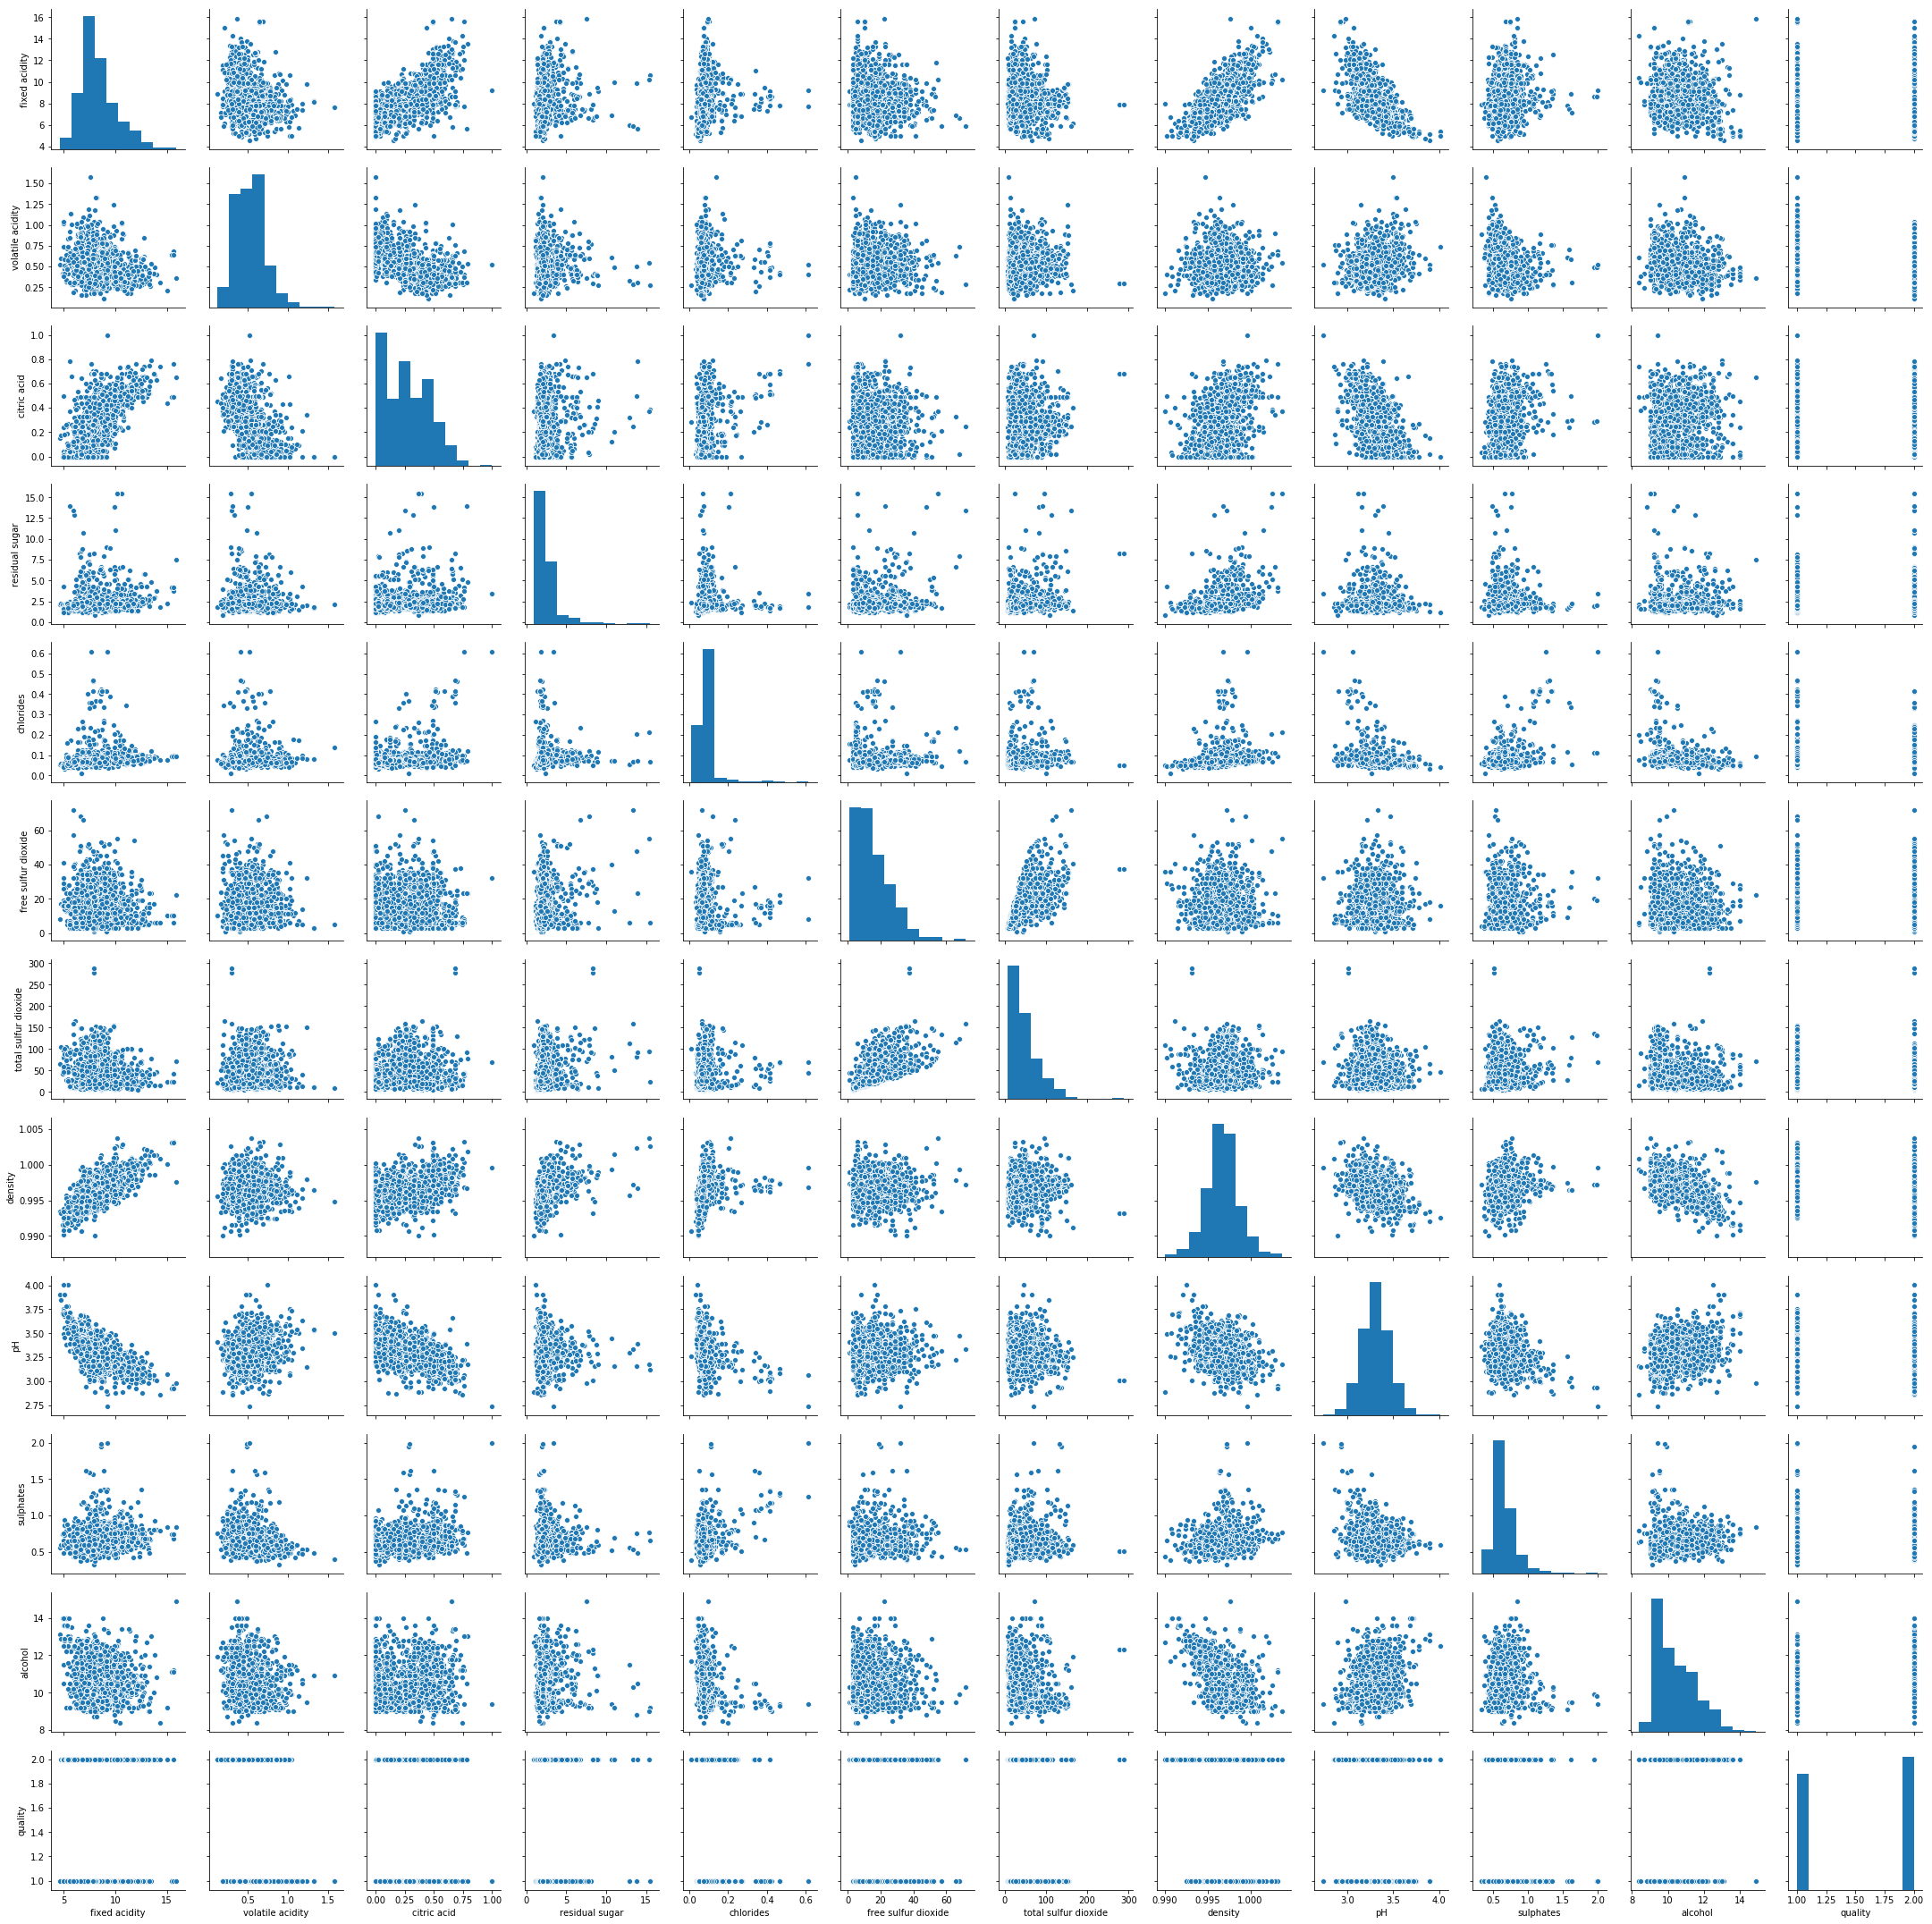

In [22]:
sns.pairplot(wine)

In [28]:
X = np.array(wine.iloc[:, [5, 6]])
y = np.array(wine.iloc[:, 11])

In [29]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
pred_svc = classifier.predict([[3,16]])
print(pred_svc)

[2]


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
# Fitting SVM to the Training set
from sklearn.svm import SVC,LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
pred_svc = classifier.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_svc) * 100, "% \n")
print("Classification report : \n",metrics.classification_report(y_test, pred_svc), "\n")

Accuracy : 61.5 % 

Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.33      0.44       185
           2       0.60      0.86      0.71       215

   micro avg       0.61      0.61      0.61       400
   macro avg       0.63      0.60      0.57       400
weighted avg       0.63      0.61      0.58       400
 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


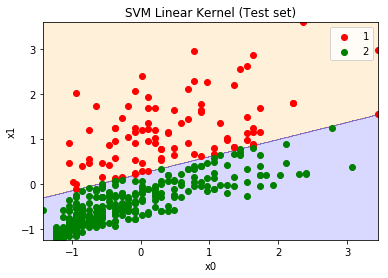

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, pred_svc

aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [36]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.03,random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
pred_svc = classifier.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_svc) * 100, "% \n")
print("Classification report : \n",metrics.classification_report(y_test, pred_svc), "\n")

Accuracy : 61.25000000000001 % 

Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.26      0.39       185
           2       0.59      0.91      0.72       215

   micro avg       0.61      0.61      0.61       400
   macro avg       0.66      0.59      0.55       400
weighted avg       0.65      0.61      0.56       400
 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


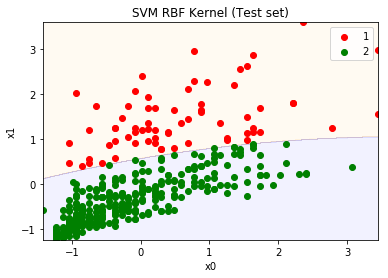

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, pred_svc

aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.05, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM RBF Kernel (Test set)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [39]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0, degree = 3)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
pred_svc = classifier.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_svc) * 100, "% \n")
print("Classification report : \n",metrics.classification_report(y_test, pred_svc), "\n")

Accuracy : 55.25 % 

Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.05      0.09       185
           2       0.55      0.99      0.70       215

   micro avg       0.55      0.55      0.55       400
   macro avg       0.65      0.52      0.40       400
weighted avg       0.64      0.55      0.42       400
 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


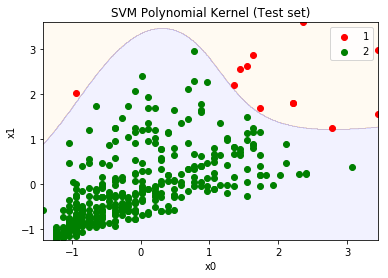

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, pred_svc

aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.05, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Polynomial Kernel (Test set)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [42]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
pred_svc = classifier.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, pred_svc) * 100, "% \n")
print("Classification report : \n",metrics.classification_report(y_test, pred_svc), "\n")

Accuracy : 49.75 % 

Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.49      0.47       185
           2       0.53      0.51      0.52       215

   micro avg       0.50      0.50      0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400
 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


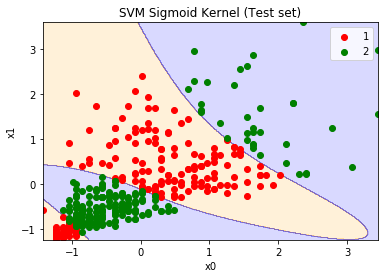

In [47]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, pred_svc

aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','yellow'))(i), label = j)
plt.title('SVM Sigmoid Kernel (Test set)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

In [48]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models=[LinearSVC(),SVC(kernel = 'rbf', random_state = 0),SVC(kernel = 'poly', random_state = 0, degree = 3),SVC(kernel = 'sigmoid', random_state = 0),
        KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LinearSVM','rbfSVM','polySVM','sigmoidSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
acc=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame.loc['9'] = ['Quadratic_SVM_from_scratch', '0.628125']
acc_frame.loc['10'] = ['Linear_SVM_from_scratch', '0.58125']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
acc_frame

,Modelling Algo,Accuracy
0,LinearSVM,0.615
1,rbfSVM,0.615
2,polySVM,0.5525
3,sigmoidSVM,0.4975
4,KNearestNeighbors,0.5975
5,RandomForestClassifier,0.625
6,DecisionTree,0.61
7,GradientBoostingClassifier,0.63
8,GaussianNB,0.58
9,Quadratic_SVM_from_scratch,0.628125
